## Author: Veera Marni
## Spark Assignment 1

### Loading Text Files

In [1]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
conf = SparkConf().setMaster("local").setAppName("My App")
sc = SparkContext(conf=conf)
# sc = SparkSession.builder.master("local")\
#             .appName("My App").config(conf=SparkConf()).getOrCreate()

### Part 1

#### Loading Million songs Data set

In [3]:
# get data from class webpage or search online
inputRDD = sc.textFile("/home/veera/Downloads/MSD.txt", 10).map(lambda line:line.split('\n'))

In [4]:
count = inputRDD.count()

In [175]:
print "The number of data points we have = ",count
print "Printing first 40 instances \n", inputRDD.take(2)

The number of data points we have =  515345
Printing first 40 instances 
[[u'2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.08960,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.72670,1.36790,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,73.04667,-37.36684,-3.13853,-24.21531,-13.23066,15.93809,-18.60478,82.15479,240.57980,-10.29407,31.58431,-25.38187,-3.90772,13.29258,41.55060,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.59110,-8.30657,7.93706,-10.73660,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.12450,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327'], [u'2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-

### Part 2 

storing data as LabeledPoint in order to train our model.

In [118]:
from pyspark.mllib.linalg import SparseVector
from pyspark.mllib.regression import LabeledPoint

def parser(x):
    x = x[0].split(',')
    return LabeledPoint(x[0], x[1:])

msd_rdd = inputRDD.map(lambda x: parser(x))

print msd_rdd.first()

(2001.0,[49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.0896,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.7267,1.3679,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,73.04667,-37.36684,-3.13853,-24.21531,-13.23066,15.93809,-18.60478,82.15479,240.5798,-10.29407,31.58431,-25.38187,-3.90772,13.29258,41.5506,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.5911,-8.30657,7.93706,-10.7366,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.1245,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327])


### Part 3

#### Feature Selection

In [ ]:
msd_subset_rdd = msd_rdd.map(lambda row: LabeledPoint(row.label, row.features[:2]))

In [69]:
msd_subset_rdd_40samples = msd_subset_rdd.takeSample(num=40,withReplacement=False)

In [84]:
heat_map_data = np.array([[x.features[0],x.features[1]] for x in msd_subset_rdd_40samples])

#### Normalization

In [102]:
from sklearn.preprocessing import MinMaxScaler

heat_map_data = MinMaxScaler().fit_transform(X=heat_map_data)
print "Normalized B/W zero and one"
print heat_map_data

Normalized B/W zero and one
[[ 0.70668931  0.38029414]
 [ 0.50343113  0.66190911]
 [ 0.38684057  0.33617136]
 [ 0.81944918  0.410139  ]
 [ 0.96704653  0.67633989]
 [ 0.74313055  0.7547258 ]
 [ 0.          0.        ]
 [ 0.55877503  0.30009062]
 [ 0.75522221  0.56031824]
 [ 0.38613429  0.12171501]
 [ 0.73595412  0.78427269]
 [ 0.87350833  0.69245537]
 [ 0.39341048  0.33771195]
 [ 0.52820607  0.25581727]
 [ 0.57101078  0.20686208]
 [ 0.85391152  0.43570341]
 [ 0.28922437  1.        ]
 [ 0.17222092  0.33425367]
 [ 0.82600836  0.68238618]
 [ 0.94357365  0.5679095 ]
 [ 0.67362638  0.46864776]
 [ 0.73898812  0.58028189]
 [ 0.9139389   0.48542156]
 [ 0.57139873  0.51678912]
 [ 0.7054295   0.54157148]
 [ 0.83326307  0.6905804 ]
 [ 0.78480569  0.70807795]
 [ 0.50386862  0.33274808]
 [ 0.7999937   0.71760885]
 [ 0.59297341  0.67469678]
 [ 0.71519968  0.61551898]
 [ 0.9260988   0.60236667]
 [ 0.81154638  0.59215826]
 [ 0.45932678  0.47008788]
 [ 0.78694913  0.70715859]
 [ 0.40718835  0.24189541]


#### Heat Map

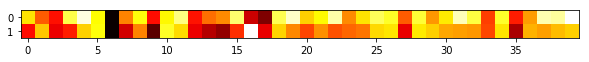

In [100]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,1))
plt.imshow(heat_map_data.T, cmap='hot', interpolation='nearest')
plt.show()

### Part 4

In [123]:
label_min = msd_rdd.map(lambda x: x.label).min()
print "label_min: ",label_min

label_min:  1922.0


In [155]:
def rescale_label(x, label_min):
    x.label = x.label - label_min
    return x

shifted_label_msd_rdd = msd_subset_rdd.map(lambda x: rescale_label(x, label_min))
print shifted_label_msd_rdd.first()

(79.0,[49.94357,21.47114])


In [159]:
print shifted_label_msd_rdd.first().features[0]

49.94357


In [160]:
col0_values = shifted_label_msd_rdd.map(lambda x: x.features[0])
col0_min = col0_values.min()
col0_max = col0_values.max()
col0_diff = col0_max - col0_min
col1_values = shifted_label_msd_rdd.map(lambda x: x.features[1])
col1_min = col1_values.min()
col1_max = col1_values.max()
col1_diff = col1_max - col1_min

In [162]:
print col0_min, col0_max, col0_diff, col1_min, col1_max, col1_diff

1.749 61.97014 60.22114 -337.0925 384.06573 721.15823


In [171]:
def feature_scaler(x, col0_min, col0_diff, col1_min, col1_diff):
    x.features = (x.features - [col0_min, col1_diff]) / ([col0_diff, col1_diff])
    return x

scaled_msd_rdd = shifted_label_msd_rdd.map(lambda x: feature_scaler \
                                           (x, col0_min, col0_diff, col1_min, col1_diff))
print scaled_msd_rdd.first()

(79.0,[0.800293219291,-0.970226866856])


### Part5

In [172]:
train, test = scaled_msd_rdd.randomSplit(weights=[0.8,0.2])

In [173]:
from pyspark.mllib.regression import LinearRegressionWithSGD

model = LinearRegressionWithSGD.train(train, iterations=10, step=0.01)

ypredictions = test.map(lambda y: (y.label, model.predict(y.features)))

rmse_err = ypredictions.map(lambda (y,p): (y-p)**2).reduce(lambda x,y: x+y) / ypredictions.count()

print rmse_err


5153.23710405


### Part6

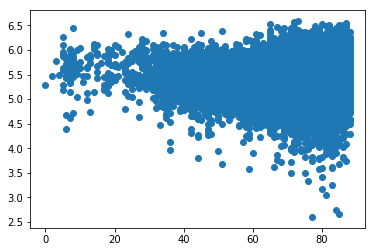

In [174]:
plt.scatter(ypredictions.map(lambda x: x[0]).collect(), ypredictions.map(lambda x: x[1]).collect())
plt.show()